<a href="https://colab.research.google.com/github/williambrunos/Data-Visualization/blob/main/Class%202/Class%202.2/Categoric_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Categoric Data: Proportions

It's important to visualize proportions between different categories on our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Pie Chart

Pie charts  are commonly used when we want to see percentages on our data, parts of a whole.

On matplotlib, we use the **pie** function to create a pie chart. As on other functions on this librarie, pie function accepts many parameters to customize the visualization.

The basics of it:
- A quantitie iterable (python list or pandas series) for quantifying the categories.
- A categories iterable (python lists or pandas series) for labeling the categories of the data.

In [15]:
# Run this cell
plt.pie?

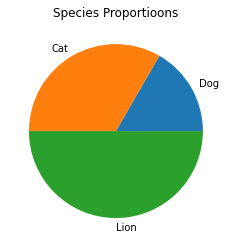

In [9]:
categories = ['Dog', 'Cat', 'Lion']
quantities = [100, 200, 300]
plt.title('Species Proportioons')
plt.pie(x = quantities, labels = categories)
plt.show()

See that with just this we can analyse the proportions and take results from it. But...the human eyes perception for areas distinguishment is not so good as we might think. Because of that, it's importatn to add the respectives percentages of each area of the pie chart.

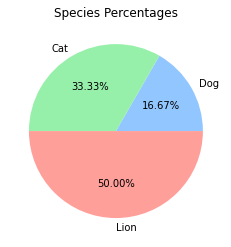

In [12]:
plt.style.use('seaborn-pastel')
plt.title('Species Percentages')
plt.pie(x = quantities, labels = categories, autopct='%1.2f%%')
plt.show()

In **autopct** we used a string as argument to indicate that we want to see the percentages with 2 decimal numbers.

A complete reference to matplotlib styles can be seen at:
https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

A complete reference to matplotlib pie chat function can be seen at:
https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

## Donut Chart

Sometimes, it's difficult to distinguish some areas on the pie chart. Because of this, we can use the donut chart, which has the same essence of the pie chart, but the proprotions here are seen by the angles of categories, not by its areas.

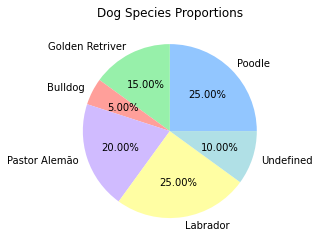

In [18]:
races = ['Poodle', 'Golden Retriver', 'Bulldog', 'Pastor Alemão', 'Labrador', 'Undefined']
quant_races = [25,15,5,20,25,10]

plt.title('Dog Species Proportions')
plt.pie(x = quant_races, labels = races, autopct='%1.2f%%')
plt.show()

Matplotlib does not have a donut chart function by itself, but we can achieve it by doing a pie chart and drawing a white circle in the center of it.

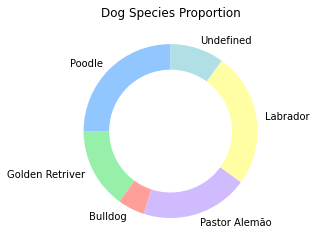

In [19]:
plt.pie(x = quant_races, labels = races, startangle = 90, pctdistance = 0.85)
my_circle=plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Dog Species Proportion')
plt.show()

### Pie and Donut Charts Weakness

- It's not efficient to visualize proportions with areas and angles, especially if there are simlar areas or angles.
- If we have a lot of categories, pie chart or donut charts are bad for visualizing data proportions (at max 5 categories).
- Don't use 3D on the visualizations! It distocers the areas and do not do the job of a good data visualization.

## Bar Graphs

Bar graphs are good choices to use instead of pie or donut charts for data with a lot of categories. It can represent well proportions on a beaultiful way.

For the nest examples, we are going to use this dataset (videogames sales):
https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/vgsales.csv

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


- Rank: Rank of Sales of the game
- Name: name of the game
- Plataform: Videogame destined for the game
- Year: Launch year of the game
- Genre: Genre of the game
- Publisher: Creator of the game
- NA_Sales: Number of sales (millions?) of the game
- EU_Sales: Number of sales on USA
- JP_Sales: Number pf sales on Japan
- Other_Sales: Sales on other countries
- Global_Sales: Sales all arround the globe

In [31]:
df.isna().sum().sum() / len(df.index) # Just aproximately 2% of the data has NaN values -> we can drop it!

0.019821665260874803

In [32]:
df.isna().sum().sum()

329

In [33]:
df = df.dropna()

In [35]:
genres = df.groupby('Genre').sum()
genres

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,25955792,6527703.0,861.77,516.48,158.65,184.92,1722.84
Adventure,14704318,2558355.0,101.93,63.74,51.99,16.70,234.59
Fighting,6371780,1675871.0,220.74,100.00,87.15,36.19,444.05
Misc,14445141,3384308.0,396.92,211.77,106.67,73.92,789.87
Platform,6019939,1753335.0,445.99,200.65,130.65,51.51,829.13
Puzzle,5496785,1142980.0,122.01,50.52,56.68,12.47,242.21
Racing,9699328,2455923.0,356.93,236.31,56.61,76.68,726.76
Role-Playing,11840252,2950365.0,326.50,187.57,350.29,59.38,923.83
Shooter,9399409,2571588.0,575.16,310.45,38.18,101.90,1026.20


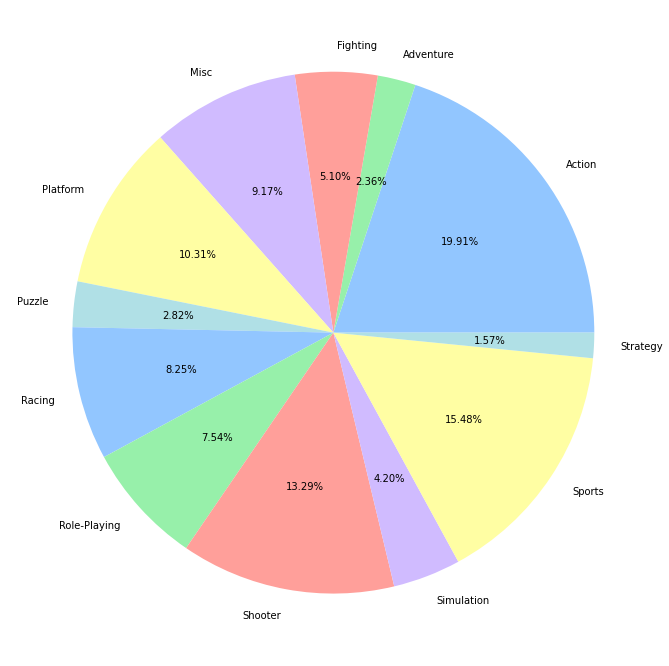

In [40]:
plt.figure(figsize=(12, 12))
plt.pie(x = genres['NA_Sales'], labels = genres.index, autopct='%1.2f%%')
plt.show()

Pretty bad, huh?

To create a proportion bar graph on matplotlib, we have to do it mannualy, plotting the categories on the x-axis and the percentages of the variable on the y-axis.

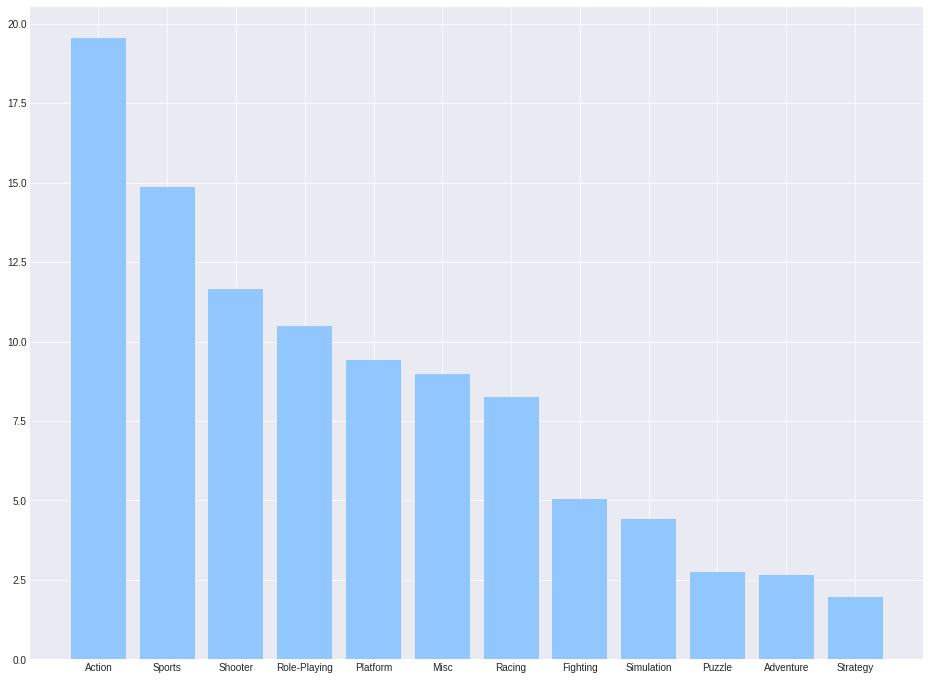

In [45]:
genres = genres.sort_values(by='Global_Sales', ascending=False) # Sorting by global sales -> starting with the major
percentages = genres['Global_Sales'] * 100 / genres['Global_Sales'].sum()
categories = genres.index

plt.figure(figsize=(16, 12))
plt.style.use('seaborn-darkgrid')
plt.bar(categories, percentages)
plt.show()

See the difference?

- Proportion bar graphs make use of sizes for transmiting the proprotions ideas.
- Pie and Donut Charts make use of areas and angles to do the same, which can be a lot overwhelming fot the visualization if it has too many elements.